In [25]:
import copy
from qutip import sigmax
from qutip.control.grape import _overlap
from notebooks.qutip_wrapper import qutip_optimize_wrapper, qutip_simulate_wrapper
%matplotlib inline
# import matplotlib.pyplot as plt
import numpy as np
# import datetime
# from qutip_wrapper import qutip_optimize_wrapper, qutip_simulate_wrapper
from notebooks.qiskit_scripts import *
# from qutip import identity, sigmax, sigmaz, sigmay, hadamard_transform


In [26]:
from qiskit import IBMQ, pulse, QuantumCircuit
from qiskit.pulse import Play
# import qiskit

IBMQ.load_account()

provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_armonk')
armonk_backend = backend
# original_backend = provider.get_backend('ibmq_armonk')

ibmqfactory.load_account:WARNING:2020-07-29 15:28:16,783: Credentials are already in use. The existing account in the session will be replaced.


In [27]:
# provider = IBMQ.get_provider(hub='ibm-q-internal', group='deployed', project='default')
# backend = provider.get_backend('ibmq_armonk')
# ham = backend.configuration().hamiltonian

In [28]:
# print(ham['h_latex'])

\begin{align} \mathcal{H}/\hbar = & \sum_{i=0}^{0}\left(\frac{\omega_{q,i}}{2} (\mathbb{1}_i-\sigma_i^{z})+ \Omega_{d,i}D_i(t)\sigma_i^{X}\right) \\ \end{align}


In [29]:
# ham

{'description': 'Qubits are modelled as a two level system. Qubits are coupled through resonator buses. The provided Hamiltonian has been projected into the zero excitation subspace of the resonator buses leading to an effective qubit-qubit flip-flop interaction. The qubit resonance frequencies in the Hamiltonian are the cavity dressed frequencies and not exactly what is returned by the backend defaults, which also includes the dressing due to the qubit-qubit interactions.\nWarning: Currently not all system Hamiltonian information is available to the public, missing values have been replaced with 0.\n',
 'h_latex': '\\begin{align} \\mathcal{H}/\\hbar = & \\sum_{i=0}^{0}\\left(\\frac{\\omega_{q,i}}{2} (\\mathbb{1}_i-\\sigma_i^{z})+ \\Omega_{d,i}D_i(t)\\sigma_i^{X}\\right) \\\\ \\end{align}',
 'h_str': ['_SUM[i,0,0,wq{i}/2*(I{i}-Z{i})]',
  '_SUM[i,0,0,omegad{i}*X{i}||D{i}]'],
 'osc': {},
 'qub': {'0': 2},
 'vars': {'omegad0': 0, 'wq0': 31.255410616078645}}

In [30]:

base_test=True

In [31]:
freq_est = 4974450442.586346
omegad0 = 31919806.545849085
dt = armonk_backend.configuration().dt
wq0 = 2 * np.pi * freq_est


In [32]:
n_ts = 1600
evo_time = dt * n_ts

In [33]:
delta = wq0/16
# delta = 0
# delta=
default_delta = wq0/16
delta_freq = delta / 2 / np.pi
# evo_tine = evo_time
phase=np.pi/3
optimized_pulse_seq, qutip_result = qutip_optimize_wrapper(delta, omegad0, evo_time, n_ts, final_evo=True, target='hadamard', p_type='RND')
# optimized_pulse_seq, qutip_result = qutip_optimize_wrapper(delta, omegad0, evo_time, n_ts, final_evo=True, target='sigmax', phase=phase)
# had_seq = qutip_optimize_wrapper(0.0000000, 1, np.pi*2, 160, final_evo=True, target='hadamard')
# had_seq
# optimized_pulse_seq[1:10]

/Users/benrosand/oct-qiskit-pulse/notebooks/qutip_wrapper.py:45: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  U_targ = hadamard_transform(1)


Final evolution
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[ 0.70056106-0.09598633j  0.70056141-0.09599237j]
 [ 0.7005615 -0.09599176j -0.70055953+0.09599748j]]



In [34]:
_overlap(sigmax(), qutip_result.evo_full_final).real, abs(_overlap(sigmax(), qutip_result.evo_full_final))**2
# _overlap(sigmax(), qutip_result.evo_full_final).real, abs(_overlap(sigmax(), qutip_result.evo_full_final))**2

(0.7005614541137017, 0.500000827287504)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[ 0.70056106-0.09598633j  0.70056141-0.09599237j]
 [ 0.7005615 -0.09599176j -0.70055953+0.09599748j]]

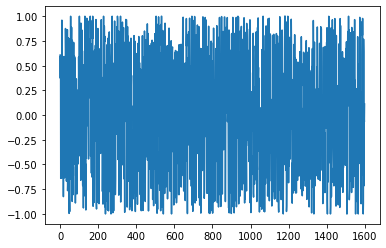

In [35]:
import matplotlib.pyplot as plt

plt.plot(optimized_pulse_seq)
qutip_result.evo_full_final

In [36]:
# dt = evo_time / n_ts
test_obj = qutip_simulate_wrapper(optimized_pulse_seq, dt, omegad0, wq0=delta, print_result=True)
# test_obj
# dt

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]


In [37]:
getattr(armonk_backend.configuration(), 'hamiltonian')['vars']['omegad0'] = omegad0
getattr(armonk_backend.configuration(), 'hamiltonian')['vars']['wq0'] = wq0

armonk_backend.configuration().qubit_lo_freq=[freq_est]

In [38]:
pulse_aer_backend = qiskit.providers.aer.PulseSimulator(
    configuration=armonk_backend.configuration())

In [39]:
# optimized_pulse_seq, qutip_result = qutip_optimize_wrapper(delta, omegad0, evo_time, n_ts, final_evo=True, target='hadamard', p_type='RND')
real_job, real_schedule = run_opt_pulse(optimized_pulse_seq, backend, freq_est=freq_est - delta_freq, sim=False, num_shots=4096)
# x_optimized_pulse_seq, x_qutip_result = qutip_optimize_wrapper(delta, omegad0, evo_time, n_ts, final_evo=True, target='sigmax', p_type='RND')
# x_real_job, x_real_schedule = run_opt_pulse(x_optimized_pulse_seq, backend, freq_est=freq_est - delta_freq, sim=False, num_shots=4096)

Job Status: job is queued (17)    

KeyboardInterrupt: 

In [40]:
# x_real_job.result().get_counts()
real_job.result().get_counts()

IBMQJobFailureError: 'Unable to retrieve result for job 5f21cb96677f60001b6b7ff4. Job has failed. Use job.error_message() to get more details.'

In [43]:
sim_job, schedule = run_opt_pulse(optimized_pulse_seq, backend, freq_est=freq_est - delta_freq, sim=True, num_shots= 4096)

# real_job ,_= run_opt_pulse(optimized_pulse_seq, backend, freq_est=4974450442, sim=False)
# real_job, real_schedule = run_opt_pulse(optimized_pulse_seq, backend, freq_est=freq_est - delta_freq, sim=False, num_shots=4096)

Job Status: job has successfully run


In [44]:
# real_schedule.draw()
# r
# real_job.result().get_counts()
sim_job.result().get_counts()

{'1': 2088, '0': 2008}

In [ ]:

q = QuantumRegister(1)
c = ClassicalRegister(1)
circ = qiskit.QuantumCircuit(q, c)
circ.x(q)
circ.measure([q], [c])

In [ ]:
r_res = real_job.result().get_counts()
def_res = def_job.result().get_counts()

In [ ]:
print(real_job.result().get_counts())
print(sim_job.result().get_counts())

In [ ]:
print('max pulse: {}'.format(max(optimized_pulse_seq)))

import matplotlib.pyplot as plt

plt.plot(optimized_pulse_seq)

In [ ]:
from collections import Counter
ct = Counter(optimized_pulse_seq)
print(ct[1])
print(ct[-1])

#

In [ ]:
# sum(sim_job.result(timeout=120).get_memory(0))
sim_job.result(timeout=120).get_counts()
# real_job.result(timeout=120).get_counts()
# real_job.error_message()
# (delta_freq + freq_est) * 1e-9

In [ ]:
# range
# real_job.e
print('freq_est: {}'.format(freq_est * 1e-9) )
print('detuned frequency: {}'.format((freq_est - delta_freq) * 1e-9))
print('detuning: {}'.format(delta_freq * 1e-9))
# freq_est * 1e-9

In [ ]:
gate, inst_map = pulse_to_gate_1q(backend, pulse.SamplePulse(optimized_pulse_seq))
# opt_tomo, _ = run_qpt_gate_1q(backend, gate, my_inst_map=inst_map, num_shots=4096)
# true_tomo, ideal_unitary = run_qpt_gate_1q(backend, gate, num_shots=4096 , default_gate='x')

In [ ]:
opt_tomo, _ = run_qpt_gate_1q(simulator, gate, my_inst_map=inst_map, num_shots=4096)

In [ ]:
# true_tomo[0].data
# convert to Choi-matrix in column-major convention
choi_ideal = np.outer(ideal_unitary.ravel(order='F'))

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
# opt_tomo, _ = run_qpt_gate_1q(simulator, gate, my_inst_map=inst_map, num_shots=4096)
opt_tomo, _ = circ_runner(simulator, gate, my_inst_map=inst_map, num_shots=4096)


In [ ]:
aer_backend = simulator

sched = run_qpt_gate_1q(aer_backend, gate, my_inst_map=inst_map, default_gate='x')
# job = qiskit.execute(sched, sim_backend, inst_map=inst_map, shots=1024)
job = qiskit.execute(sched, aer_backend, shots=1024)

In [ ]:
job.result().get_counts()

In [ ]:
aer_backend.configuration().basis_gates

In [ ]:
# armonk_backend.defaults().instruction_schedule_map.instructions

In [ ]:
# gate, inst_map = pulse_to_gate_1q(qasm_backend, pulse.SamplePulse(optimized_pulse_seq))
import qiskit

In [ ]:

q = QuantumRegister(1)
circ = qiskit.QuantumCircuit(1,1)
circ.x(0)
# circ.append(gate, [0])
circ.measure([0], [0]]
# circ = transpiled_circ
# job = qiskit.execute(circ, Aer.get_backend('unitary_simulator'))
# ideal_unitary = job.result().get_unitary(circ)

# Generate process tomography circuits and run on qasm simulator
qpt_circs = process_tomography_circuits(circ, q)

#could also rename to x
#Make sure that drive strength is set on armonk_backend
# transpiled_circ = qiskit.transpile(qpt_circs,backend=armonk_backend, basis_gates=armonk_backend.configuration().basis_gates + ['opt_gate'])
pulse_transp_circ = qiskit.transpile(circ, backend=pulse_aer_backend, basis_gates=armonk_backend.configuration().basis_gates + ['opt_gate'])

gate_sched = qiskit.schedule(pulse_transp_circ, inst_map=inst_map, backend=pulse_aer_backend, meas_map=[[0]])

job = qiskit.execute(gate_sched, pulse_aer_backend, shots=4096, system_model=PulseSystemModel.from_backend(armonk_backend))
job.result().get_counts()

In [ ]:
qpt_circs = process_tomography_circuits(circ, q)
transpiled_circ = qiskit.transpile(qpt_circs,backend=pulse_aer_backend, basis_gates=armonk_backend.configuration().basis_gates + ['opt_gate'])
qpt_sched = qiskit.schedule(transpiled_circ, inst_map=inst_map, backend=pulse_aer_backend, meas_map = [[0]])
aer_model = PulseSystemModel.from_backend(armonk_backend)
# job = pulse_aer_backend.run(qpt_sched, aer_model)
# job = qiskit.execute(qpt_sched[0], pulse_aer_backend, shots=4096, system_model=aer_model)
jobs = [qiskit.execute(sched, pulse_aer_backend, shots=4096, system_model=aer_model) for sched in qpt_sched]

In [ ]:
# job.error_message()
# job.result().get_counts()

# tomo = ProcessTomographyFitter(jobs, transpiled_circ)
results = [j.result() for j in jobs]

In [ ]:
# ProcessTomographyFitter(results, transpiled_circ)
my_gate_tomo = ProcessTomographyFitter(results[0], [transpiled_circ[0]])
for i,res in enumerate(results[:-1]):
    my_gate_tomo.add_data(results[i+1], [transpiled_circ[i+1]])
        
# transpiled_circ[0].cregs

In [ ]:
len(results[:-1])
# len(my_gate_tomo)

In [ ]:

#NOTE below works but the job cannot be fed correctly to final line
qpt_circs = process_tomography_circuits(circ, q)
transpiled_circ = qiskct.transpile(qpt_circs,backend=pulse_aer_backend, basis_gates=armonk_backend.configuration().basis_gates + ['opt_gate'])
qpt_sched = qiskit.schedule(transpiled_circ, inst_map=inst_map, backend=pulse_aer_backend, meas_map = [[0]])
aer_model = PulseSystemModel.from_backend(armonk_backend)
# job = pulse_aer_backend.run(qpt_sched, aer_model)
job = qiskit.execute(qpt_sched, pulse_aer_backend, shots=4096, system_model=aer_model)


In [ ]:

from qiskit.tools.qi.qi import outer
# Process tomography of a Hadamard gate
q = QuantumRegister(1)
circ = qiskit.QuantumCircuit(q)
circ.x(q[0])

# Run circuit on unitary simulator to find ideal unitary
unitary_job = qiskit.execute(circ, Aer.get_backend('unitary_simulator'))
ideal_unitary = unitary_job.result().get_unitary(circ)
# convert to Choi-matrix in column-major convention
choi_ideal = outer(ideal_unitary.ravel(order='F'))

# Generate process tomography circuits and run on qasm simulator
qpt_circs = process_tomography_circuits(circ, q)
ideal_job = qiskit.execute(qpt_circs, Aer.get_backend('qasm_simulator'), shots=4000)
# ideal_armonk_job = qiskit.execute(qpt_circs, armonk_backend, shots=4096)

# Extract tomography data so that counts are indexed by measurement configuration
ideal_qpt_tomo = ProcessTomographyFitter(ideal_job.result(), qpt_circs)
# ideal_armonk_qpt = ProcessTomographyFitter(ideal_armonk_job.result(), qpt_circs)
# ideal_qpt_tomo.data

x_choi_lstsq = ideal_qpt_tomo.fit(method='lstsq')
# armonk_choi_lstsq = ideal_armonk_qpt.fit(method='lstsq')

In [ ]:
ideal_qpt_tomo.data

In [ ]:
my_gate_tomo.data

In [ ]:
# MLE Least-Squares tomographic reconstruction
t = time.time()
qpt_tomo = my_gate_tomo
# qpt_tomo = ideal_qpt_tomo
choi_lstsq = qpt_tomo.fit(method='lstsq')
# choi_lstsq = x_choi_lstsq
# choi_lstsq = armonk_choi_lstsq

print('Least-Sq Fitter')
print('fit fidelity (state):', state_fidelity(choi_ideal / 2, choi_lstsq.data / 2))
print('fit time:', time.time() - t)
print('fit fidelity (process):', np.real(process_fidelity(choi_ideal, choi_lstsq.data, require_cptp=False)))


# CVXOPT Semidefinite-Program tomographic reconstruction
t = time.time()
choi_cvx = qpt_tomo.fit(method='cvx')
print('\nCVXOPT Fitter')
print('fit time:', time.time() - t)
print('fit fidelity (state):', state_fidelity(choi_ideal / 2, choi_cvx.data / 2))
print('fit fidelity (process):', np.real(process_fidelity(choi_ideal, choi_cvx.data, require_cptp=False)))


In [ ]:
from qiskit import IBMQ
import qiskit.tools.jupyter
%matplotlib inline

IBMQ.load_account()

%qiskit_backend_overview

In [ ]:
from qiskit import IBMQ
import qiskit.tools.jupyter
%matplotlib inline

IBMQ.load_account()

%qiskit_backend_overview

In [ ]:
ideal_qpt_tomo.data

In [ ]:
my_gate_tomo.data

In [ ]:
# MLE Least-Squares tomographic reconstruction
t = time.time()
qpt_tomo = my_gate_tomo
# qpt_tomo = ideal_qpt_tomo
choi_lstsq = qpt_tomo.fit(method='lstsq')
# choi_lstsq = x_choi_lstsq
# choi_lstsq = armonk_choi_lstsq

print('Least-Sq Fitter')
print('fit fidelity (state):', state_fidelity(choi_ideal / 2, choi_lstsq.data / 2))
print('fit time:', time.time() - t)
print('fit fidelity (process):', np.real(process_fidelity(choi_ideal, choi_lstsq.data, require_cptp=False)))


# CVXOPT Semidefinite-Program tomographic reconstruction
t = time.time()
choi_cvx = qpt_tomo.fit(method='cvx')
print('\nCVXOPT Fitter')
print('fit time:', time.time() - t)
print('fit fidelity (state):', state_fidelity(choi_ideal / 2, choi_cvx.data / 2))
print('fit fidelity (process):', np.real(process_fidelity(choi_ideal, choi_cvx.data, require_cptp=False)))


In [ ]:
from qiskit import IBMQ
import qiskit.tools.jupyter
%matplotlib inline

IBMQ.load_account()

%qiskit_backend_overview